In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from costs import *
from lab_helpers import *
from plots_lab4 import *
from my_helpers import *
import pandas as pd
import matplotlib.pyplot as plt

## To Do Graphs
- PCA Decomposition + Classification
- Correlation
- Changing loss for different algorithms
- ???

## To Do tasks
- Manuel: implement K-fold to choose degree, change split data , deal with outliers, adding log colm (?)
- Gabbo: ?
- Marco: ?

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
y_or, tX_or, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
y = y_or
tX = tX_or

In [5]:
#for logistic
y = y_for_logistic(y)

## Data preprocessing

In [7]:
x_tr_tot, x_te_tot, y_tr_tot, y_te_tot = split_data(y,tX,0.8,1)

In [8]:
y_tr, tX_tr, indexes_tr, means_tr, std_tr = preprocessing(y_tr_tot, x_tr_tot)

C:\Users\Manuel\Anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
y_te, tX_te, indexes_te, means_te, std_te = preprocessing(y_te_tot, x_te_tot)

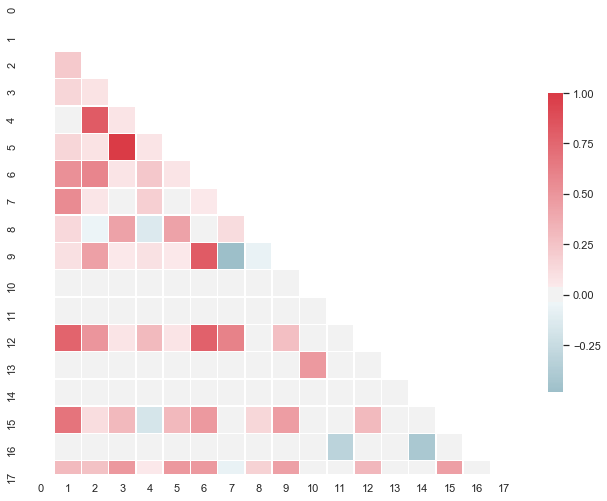

In [11]:
import seaborn as sns
sns.set(style="white")

d = pd.DataFrame(tX_tr[0])
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.222818,0.153118,0.013577,0.153118,0.526825,0.554497,0.139487,0.097695,-0.011750,-0.009587,0.767174,0.009557,0.000045,0.683952,-0.012558,0.297913
2,NaN,0.222818,1.000000,0.080822,0.816215,0.080822,0.591818,0.066611,-0.052930,0.444042,0.008455,-0.009865,0.503706,0.003396,0.002153,0.112627,0.002814,0.264899
3,NaN,0.153118,0.080822,1.000000,0.068972,1.000000,0.079633,0.028400,0.427578,0.051413,-0.004841,-0.010717,0.076707,0.014837,-0.008005,0.305847,0.005470,0.488733
4,NaN,0.013577,0.816215,0.068972,1.000000,0.068972,0.235120,0.190329,-0.129888,0.088310,0.018118,-0.013987,0.294493,0.004991,-0.001631,-0.172573,0.006680,0.051648
5,NaN,0.153118,0.080822,1.000000,0.068972,1.000000,0.079633,0.028400,0.427578,0.051413,-0.004841,-0.010717,0.076707,0.014837,-0.008005,0.305847,0.005470,0.488733
6,NaN,0.526825,0.591818,0.079633,0.235120,0.079633,1.000000,0.054352,-0.023773,0.814027,-0.016802,-0.017608,0.782848,-0.002624,0.001809,0.475407,0.002892,0.477054
7,NaN,0.554497,0.066611,0.028400,0.190329,0.028400,0.054352,1.000000,0.125626,-0.481483,-0.007290,-0.014858,0.605737,0.004836,-0.014036,-0.022419,0.001739,-0.060124
8,NaN,0.139487,-0.052930,0.427578,-0.129888,0.427578,-0.023773,0.125626,1.000000,-0.069603,-0.008716,0.004768,0.035220,-0.003812,0.001460,0.146494,-0.013417,0.177136
9,NaN,0.097695,0.444042,0.051413,0.088310,0.051413,0.814027,-0.481483,-0.069603,1.000000,-0.011382,-0.007245,0.275861,-0.006110,0.007499,0.453835,0.005364,0.442722


In [12]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    first = np.sum(np.log(1+np.exp(tx.dot(w))))
    second = y.T.dot(tx.dot(w))
    return first - second

In [13]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot(sigmoid(tx.dot(w))-y)

In [14]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    new_w = w - gamma * grad
    new_loss = calculate_loss(y, tx, new_w)
    if new_loss <= loss:
        loss , w = new_loss, new_w
        gamma *=2
    return loss, w

In [65]:
def logistic_regression_gradient_descent(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.00001
    losses = []

    # build tx
    #tx = np.c_[np.ones((y.shape[0],)), x]
    tx = x
    w = np.ones((tx.shape[1],))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    #print("loss={l}".format(l=calculate_loss(y, tx, w)))
    return loss, w

In [66]:
list_loss = []
list_w = []
for jet in range(0,8):
    loss, w = logistic_regression_gradient_descent(y_tr[jet], tX_tr[jet])
    list_loss.append(loss)
    list_w.append(w)

Current iteration=0, loss=9713.564627367217
Current iteration=1000, loss=3598.244479355567
Current iteration=2000, loss=3588.0652021514547
Current iteration=3000, loss=3585.067063205915
Current iteration=4000, loss=3583.1956217387524
Current iteration=5000, loss=3581.688429287375
Current iteration=6000, loss=3580.3920323164257
Current iteration=7000, loss=3579.2580002973227
Current iteration=8000, loss=3578.2602771104357
Current iteration=9000, loss=3577.3794429350373
Current iteration=0, loss=68304.08975300708
Current iteration=1000, loss=29060.060617504856
Current iteration=2000, loss=28949.45433270966
Current iteration=3000, loss=28922.961199817397
Current iteration=4000, loss=28906.169958351576
Current iteration=5000, loss=28891.74603589508
Current iteration=6000, loss=28878.641286660728
Current iteration=7000, loss=28866.521418362696
Current iteration=8000, loss=28855.178621915184
Current iteration=9000, loss=28844.457470306326
Current iteration=0, loss=4053.5660788639666
Current 

In [67]:
#cell for logistic
y_pred = build_predictions(tX_te, indexes_te, list_w, logistic=True) 
acc = accuracy(y_te_tot, y_pred)
print(acc)

0.69218


In [90]:
def logistic_regression_sub_gradient_descent(y, x):
    # init parameters
    max_iter = 3000
    threshold = 1e-8
    gamma = 0.1
    losses = []

    # build tx
    #tx = np.c_[np.ones((y.shape[0],)), x]
    tx = x
    w = np.ones((tx.shape[1],))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        for yn, xn in batch_iter(y, tx, 1):
            loss, w = learning_by_gradient_descent(yn, xn, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    #print("loss={l}".format(l=calculate_loss(y, tx, w)))
    return loss, w

In [91]:
list_loss = []
list_w = []
for jet in range(0,8):
    loss, w = logistic_regression_sub_gradient_descent(y_tr[jet], tX_tr[jet])
    list_loss.append(loss)
    list_w.append(w)

Current iteration=0, loss=0.13529661680985303
Current iteration=100, loss=0.006619917537084934
Current iteration=200, loss=0.006474145952022971
Current iteration=300, loss=0.04584552160523338
Current iteration=400, loss=0.02196314570109435
Current iteration=500, loss=0.0010193212563617598
Current iteration=600, loss=4.5593942843424884e-08
Current iteration=700, loss=0.006477341750429219
Current iteration=800, loss=0.03187686532075339
Current iteration=900, loss=0.0009545005459552203
Current iteration=1000, loss=0.03497321334828652
Current iteration=1100, loss=0.00670726426427068
Current iteration=1200, loss=0.0036648902550479997
Current iteration=1300, loss=0.002549692532486056
Current iteration=1400, loss=0.13098449083227326
Current iteration=1500, loss=0.001784941310865318
Current iteration=1600, loss=0.027322230317328042
Current iteration=1700, loss=0.0024520583874172775
Current iteration=1800, loss=0.1972891090069856
Current iteration=1900, loss=0.008183409894541912
Current iterati

In [92]:
#cell for logistic
y_pred = build_predictions(tX_te, indexes_te, list_w, logistic=True) 
acc = accuracy(y_te_tot, y_pred)
print(acc)

0.72424


In [61]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    N = tx.shape[0]
    S = np.zeros((N,N))
    for i in range(N):
        sigma = sigmoid(tx[i,:].T.dot(w))
        S[i,i] = sigma*(1-sigma)
    return tx.T.dot(S).dot(tx)

In [18]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

In [47]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # mettiamo il gamma???????
    gamma = 0.001
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w = w - gamma * np.linalg.inv(hessian).dot(gradient)
    return loss, w

In [63]:
def logistic_regression_newton_method(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    #tx = np.c_[np.ones((y.shape[0],)), x]
    tx = x
    w = np.random.randn(tx.shape[1])
    
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        for yn, xn in batch_iter(y, tx, 1):
            loss, w = learning_by_newton_method(yn, xn, w)
            #print (xn.shape)
            #print(calculate_hessian(yn, xn, w).shape)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return loss, w

In [64]:
list_loss = []
list_w = []
for jet in range(0,8):
    loss, w = logistic_regression_newton_method(y_tr[jet], tX_tr[jet])
    list_loss.append(loss)
    list_w.append(w)


Current iteration=0, the loss=22.732827798849165


LinAlgError: Singular matrix

In [83]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    N = tx.shape[0]
    D = tx.shape[1]
    loss = calculate_loss(y, tx, w) + lambda_ / 2 * np.linalg.norm(w)
    gradient = calculate_gradient(y, tx, w) + lambda_ * w
    #hessian = calculate_hessian(y, tx, w) + N * np.identity(D)
    #return loss, gradient, hessian
    return loss, gradient

In [84]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    #loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma * gradient
    return loss, w

In [204]:
def logistic_regression_penalized_gradient_descent(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.00001
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    #tx = np.c_[np.ones((y.shape[0],)), x]
    tx = x
    w = np.zeros((tx.shape[1],))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return loss, w

In [205]:
list_loss = []
list_w = []
for jet in range(0,8):
    loss, w = logistic_regression_penalized_gradient_descent(y_tr[jet], tX_tr[jet])
    list_loss.append(loss)
    list_w.append(w)

Current iteration=0, loss=14466.674805466619
Current iteration=1000, loss=3596.1595805480833
Current iteration=2000, loss=3590.400230578218
Current iteration=3000, loss=3588.004053035492
Current iteration=4000, loss=3586.0540170462436
Current iteration=5000, loss=3584.374003250526
Current iteration=6000, loss=3582.911314632176
Current iteration=7000, loss=3581.6332421478874
Current iteration=8000, loss=3580.51377168331
Current iteration=9000, loss=3579.5308840230578
Current iteration=0, loss=40931.72730642589
Current iteration=1000, loss=28898.054993920876
Current iteration=2000, loss=28841.118146807963
Current iteration=3000, loss=28827.039627332924
Current iteration=4000, loss=28817.220521561856
Current iteration=5000, loss=28808.083030179223
Current iteration=6000, loss=28799.214736122674
Current iteration=7000, loss=28790.539796435227
Current iteration=8000, loss=28782.025698634723
Current iteration=9000, loss=28773.650047570416
Current iteration=0, loss=4160.962524901352
Current i

IndexError: list index out of range

In [207]:
#cell for logistic
y_pred = build_predictions(tX_te, indexes_te, list_w, logistic=True) 
acc = accuracy(y_te_tot, y_pred)
print(acc)

0.7504


## Generate predictions and save ouput in csv format for submission:

#### Use Accuracy and F1 Score on our classification:

In [183]:
#cell for logistic
y_pred = build_predictions(tX_te, indexes_te, list_w,logistic=True) 


In [184]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [185]:
acc = accuracy(y_te_tot, y_pred)
print(acc)

0.7516


#### Build submission

In [186]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_new, indexes_test_new, means_test, stds_test = preprocessing([], tX_test, test=True) #same function as train,

In [190]:
#cell for logistic
y_pred_test = build_predictions(tX_test_new, indexes_test_new, list_w, logistic=True)
OUTPUT_PATH = 'submission.csv'
create_csv_submission(ids_test, y_pred_test, OUTPUT_PATH, logistic=True) #logistic flags convert [0, 1] to [-1, 1]

In [12]:
#we will need something like this

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])

NameError: name 'tX_test_s' is not defined